# Questions:

1. Is there a difference in survival rate between male and female ?
2. Is there a difference between overall passenger survival rate and children(under 18) survival rate? If so, are girls (under 18) more likely to survive than boys (under 18)?
3. Do survival rates vary among the three passenger classes (1st, 2nd, and 3rd)?
4. Do survival rates vary among passengers who boarded from different ports (Cherbourg, Queenstown, and Southampton)? If so, what is causing the difference?

In [9]:
#Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

#Loading the data
df = pd.read_csv("titanic-data.csv")

### Data Exploration

In [16]:
#Examining the data structure
len(df) # the data has 891 rows
df.isnull().sum() #177 missing rows in "Age" column and 687 missing rows in "Cabin" column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There's 177 missing values in "Age" column, 687 missing values in "Cabin" column and 2 missing values in "Embarked" column. When I use data from these two columns, I will ignore these rows.

 I am curious to see what the age distribution looks like for the passengers in Titanic. Let's keep in mind that the data is missing the age of 177 passengers.

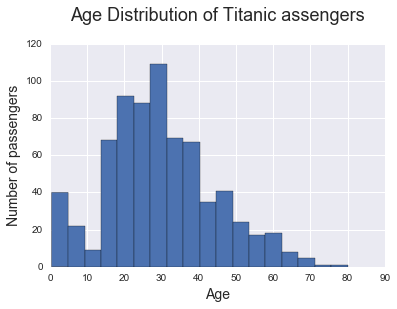

In [24]:
df_no_NA = df[-df['Age'].isnull()] # removing missing values in "Age" column (177 rows)
plt.hist(df_no_NA['Age'], bins = 18)
plt.ylabel('Number of passengers', fontsize = 14)
plt.xlabel('Age', fontsize = 14)
plt.title('Age Distribution of Titanic assengers', fontsize = 18, y = 1.08)

It seems that most of the passengers fell in age category of 15 - 40. Among children (passengers under 18) it seems that the two most populous groups are those that are under 5 and those that are between 15 - 18. 

Having seen the distribution of the age of all passengers, I would like to get a quick estimate of how many passengers from each age group survived. To do this, I will overlay the above histogram with the new plot of the distribution of the age of passengers who survived.

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.legend>

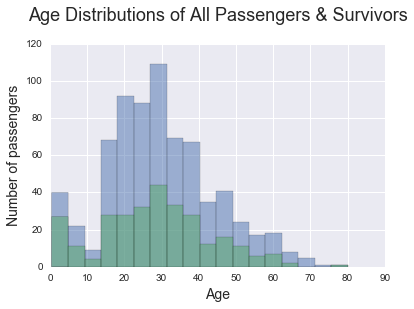

In [27]:
%pylab inline
no_NA_and_survived = df[(-df['Age'].isnull()) & df['Survived'] == 1] # removing missing values in "Age" column (177 rows) and selecting only those who survived.
plt.hist(df_no_NA['Age'], bins = 18, alpha = 0.5)
plt.hist(no_NA_and_survived['Age'], bins = 18, alpha = 0.5)
plt.ylabel('Number of passengers', fontsize = 14)
plt.xlabel('Age', fontsize = 14)
plt.title('Age Distributions of All Passengers & Survivors', fontsize = 18, y = 1.08)

The general trend seems to be that less than half of passengers across all age groups survived the accident. What's notable is that the survival rate for children under 5 seems to be well above 50 %. Even for children around 5 - 15, survival rates seem to be higher than for other age groups. From the plot above, I am curious about two things: 1) how did people's survival rates differ based on their gender? 2) how much more likely were children (under 18) to survive than the general population?

### How did people's survival rates differ based on their gender? 


In [46]:
#Calculating the overall survival rate from the Titanic crash
number_of_people_survived = df.sum()['Survived']
total_number_of_people = len(df)
overall_survival_rate = number_of_people_survived / total_number_of_people * 100

#Calculating the percentage of male that survived out of all the males in the ship
number_of_males_survived = df.groupby('Sex').sum().loc['male', 'Survived']
total_number_of_males = len(df.groupby('Sex').groups['male'])
male_survival_rate = number_of_males_survived / total_number_of_males * 100


#Calculating the percentage of female that survived out of all the females in the ship
number_of_females_survived = df.groupby('Sex').sum().loc['female', 'Survived']
total_number_of_females = len(df.groupby('Sex').groups['female'])
female_survival_rate = number_of_females_survived / total_number_of_females * 100


print 'This is the overall survival rate:', overall_survival_rate, '%'
print 'This is the male survival rate: ', male_survival_rate, '%' #this is how likely you are to survive among men if you are man
print 'This is the female survival rate: ', female_survival_rate, '%' #this is how likely you are to survive among women if you are woman


This is the overall survival rate: 38.3838383838 %
This is the male survival rate:  18.8908145581 %
This is the female survival rate:  74.2038216561 %


Populating the interactive namespace from numpy and matplotlib


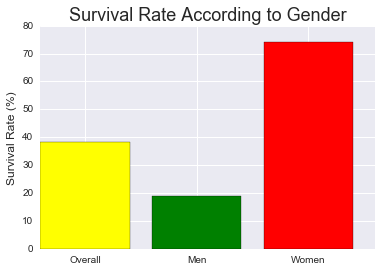

In [47]:
%pylab inline
plt.bar([0, 1, 2] , [38.38, 18.89, 74.20], color = ['yellow', 'green', 'red'])
plt.ylabel('Survival Rate (%)', fontsize = 12)
plt.xticks([0.4, 1.4, 2.4], ('Overall', 'Men', 'Women'))
plt.title('Survival Rate According to Gender', fontsize = 18)

As we can see from the plot above, women were a lot more likely to survive (74.20 %) than men (18.89 %). The overall survival rate was 38.38 %. Men's survival rate was lower than the overall survival rate while women's survival rate was higer than the overall survival rate.

Having seen that women had a higher survival rate, I am curious as to see if children/adolescents (under 18) were also more likely to survive. If so, were girls more likely to survive than boys?

### Children Survival Rate


In [48]:
#NOTE : 
#Since I'm selecting for passengers under 18, those rows without age values (missing values) will be ignored. 
#There were 177 missing rows total in "Age" Column


#Calculating the percentage of children (under 18) that survived out of all the children in the ship
number_of_children_survived = df[df['Age'] < 18.0].sum()['Survived']
total_number_of_children = len(df[df['Age'] < 18.0])
children_survival_rate = number_of_children_survived / total_number_of_children * 100


#Calculating the percentage of boys that survived out of all the boys in the ship
number_of_boys_survived = df[df['Age'] < 18.0].groupby('Sex').sum().loc['male', 'Survived']
total_number_of_boys = len(df[(df['Age'] < 18.0) & (df['Sex'] == 'male')])
boys_survival_rate = number_of_boys_survived / total_number_of_boys * 100


#Calculating the percentage of girls that survived out of all the girls in the ship
number_of_girls_survived = df[df['Age'] < 18.0].groupby('Sex').sum().loc['female', 'Survived']
total_number_of_girls = len(df[(df['Age'] < 18.0) & (df['Sex'] == 'female')])
girls_survival_rate = number_of_girls_survived / total_number_of_girls * 100


print 'this is the overall children survival rate:', children_survival_rate, '%'
print 'this is the boys\' survival rate:', boys_survival_rate, '%' 
print 'this is the girls\' survival rate:', girls_survival_rate, '%'

this is the overall children survival rate: 53.982300885 %
this is the boys' survival rate: 39.6551724138 %
this is the girls' survival rate: 69.0909090909 %


Populating the interactive namespace from numpy and matplotlib


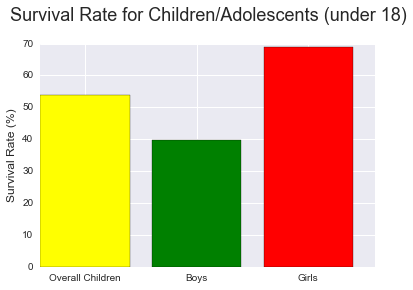

In [49]:
%pylab inline
plt.bar([0, 1, 2] , [53.98, 39.66, 69.09], color = ['yellow', 'green', 'red'])
plt.ylabel('Survival Rate (%)', fontsize = 12)
plt.xticks([0.4, 1.4, 2.4], ('Overall Children', 'Boys', 'Girls'))
plt.title('Survival Rate for Children/Adolescents (under 18)', fontsize = 18, y = 1.08)

As seen from the plot above, overall survival rate for children (regardless of gender) *is* higher (53.98 %) than the overall survival rate for all passengers (38.38 %). It is also surprising to find that even among those under 18, girls had a higher survival rate than boys.

Now, let's find out if survival rates differed among the three passenger classes (1st, 2nd, or 3rd).

### Survival Rates among 1st, 2nd, and 3rd Passenger Classes

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# Calculating the survival rate of Passenger class 1 
pclass_1_survived = len(df[(df['Pclass'] == 1) & (df['Survived'] == 1)])
pclass_1_survived = float(pclass_1_survived)
total_pclass_1 = len(df[df['Pclass'] == 1]) # total number of P. class 1
pclass_1_survival_rate = pclass_1_survived / total_pclass_1 * 100


# Calculating the survival rate of Passenger class 2
pclass_2_survived = len(df[(df['Pclass'] == 2) & (df['Survived'] == 1)])
pclass_2_survived = float(pclass_2_survived)
total_pclass_2 = len(df[df['Pclass'] == 2]) # total number of P. class 2
pclass_2_survival_rate = pclass_2_survived / total_pclass_2 * 100


#Calculating the survival rate of Passenger class 2
pclass_3_survived = len(df[(df['Pclass'] == 3) & (df['Survived'] == 1)])
pclass_3_survived = float(pclass_3_survived)
total_pclass_3 = len(df[df['Pclass'] == 3]) # total number of P. class 3
pclass_3_survival_rate = pclass_3_survived / total_pclass_3 * 100

print 'This is the Passenger class 1 survival rate:', pclass_1_survival_rate, '%'
print 'This is the Passenger class 2 survival rate:', pclass_2_survival_rate, '%'
print 'This is the Passenger class 3 survival rate:', pclass_3_survival_rate, '%'

This is the Passenger class 1 survival rate: 62.962962963 %
This is the Passenger class 2 survival rate: 47.2826086957 %
This is the Passenger class 3 survival rate: 24.2362525458 %


Populating the interactive namespace from numpy and matplotlib


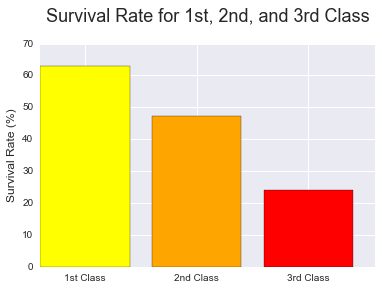

In [52]:
%pylab inline
plt.bar([0, 1, 2] , [62.96, 47.28, 24.24], color = ['yellow', 'orange', 'red'])
plt.ylabel('Survival Rate (%)', fontsize = 12)
plt.xticks([0.4, 1.4, 2.4], ('1st Class', '2nd Class', '3rd Class'))
plt.title('Survival Rate for 1st, 2nd, and 3rd Class', fontsize = 18, y = 1.08)

1st class passenger was more than 2.5 times likely to survive (62.96 %) than 3rd class passenger (24.24 %). 2nd class passenger was almost twice as likely to survive (47.28 %) than 3rd class passenger !

Let's take a look at how survival rates between male and female compare across the different passenger classes:

### Survival rates between male and female  across 1st, 2nd, & 3rd class

In [53]:
# Looking at survival rates of male and female in Pclass 1----------------------------------------------------------
male_pclass1_survived = df[(df['Pclass'] == 1) & (df['Sex'] == 'male') & (df['Survived'] == 1)].sum()['Survived']
female_pclass1_survived = df[(df['Pclass'] == 1) & (df['Sex'] == 'female') & (df['Survived'] == 1)].sum()['Survived']

total_male_pclass1 = float(len(df[(df['Pclass'] == 1) & (df['Sex'] == 'male')]))
total_female_pclass1 = float(len(df[(df['Pclass'] == 1) & (df['Sex'] == 'female')]))

male_pclass1_survival_rate = male_pclass1_survived / total_male_pclass1 * 100
female_pclass1_survival_rate = female_pclass1_survived / total_female_pclass1 * 100



# Looking at survival rates of male and female in Pclass 2-----------------------------------------------------------
male_pclass2_survived = df[(df['Pclass'] == 2) & (df['Sex'] == 'male') & (df['Survived'] == 1)].sum()['Survived']
female_pclass2_survived = df[(df['Pclass'] == 2) & (df['Sex'] == 'female') & (df['Survived'] == 1)].sum()['Survived']

total_male_pclass2 = float(len(df[(df['Pclass'] == 2) & (df['Sex'] == 'male')]))
total_female_pclass2 = float(len(df[(df['Pclass'] == 2) & (df['Sex'] == 'female')]))

male_pclass2_survival_rate = male_pclass2_survived / total_male_pclass2 * 100
female_pclass2_survival_rate = female_pclass2_survived / total_female_pclass2 * 100



# Looking at survival rates of male and female in Pclass 3------------------------------------------------------------
male_pclass3_survived = df[(df['Pclass'] == 3) & (df['Sex'] == 'male') & (df['Survived'] == 1)].sum()['Survived']
female_pclass3_survived = df[(df['Pclass'] == 3) & (df['Sex'] == 'female') & (df['Survived'] == 1)].sum()['Survived']

total_male_pclass3 = float(len(df[(df['Pclass'] == 3) & (df['Sex'] == 'male')]))
total_female_pclass3 = float(len(df[(df['Pclass'] == 3) & (df['Sex'] == 'female')]))

male_pclass3_survival_rate = male_pclass3_survived / total_male_pclass3 * 100
female_pclass3_survival_rate = female_pclass3_survived / total_female_pclass3 * 100


#-------------------------------------------------------------------------------------------------------------------
print "this is the survival rate for male in first passenger class", male_pclass1_survival_rate, '%'
print "this is the survival rate for female in first passenger class", female_pclass1_survival_rate, '%'
print ''
print "this is the survival rate for male in second passenger class", male_pclass2_survival_rate, '%'
print "this is the survival rate for female in second passenger class", female_pclass2_survival_rate, '%'
print ''
print "this is the survival rate for male in third passenger class", male_pclass3_survival_rate, '%'
print "this is the survival rate for female in third passenger class", female_pclass3_survival_rate, '%'

this is the survival rate for male in first passenger class 36.8852459016 %
this is the survival rate for female in first passenger class 96.8085106383 %

this is the survival rate for male in second passenger class 15.7407407407 %
this is the survival rate for female in second passenger class 92.1052631579 %

this is the survival rate for male in third passenger class 13.5446685879 %
this is the survival rate for female in third passenger class 50.0 %


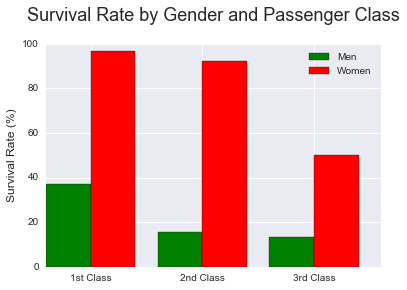

In [54]:

n_groups = 3
surv_rate_men = (36.89, 15.74, 13.54)
surv_rate_women = (96.81, 92.11, 50.0)
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.40
barplot_men = plt.bar(index, surv_rate_men, width = bar_width,
                 color='green',
                 label='Men')

barplot_women = plt.bar(index + bar_width, surv_rate_women, bar_width,
                 color='red',
                 label='Women')

plt.ylabel('Survival Rate (%)', fontsize = 12)
plt.title('Survival Rate by Gender and Passenger Class', fontsize = 18, y = 1.08)
plt.xticks(index + bar_width, ('1st Class', '2nd Class', '3rd Class'))
plt.legend()

As we can see from the graph and statistics of the survival rates above, survival rates tend to drop across passenger classes (from 1st class to 3rd class). It is also easy to see that women's survival rates are notably higher in all passenger classes compared to men. For example, survival rates of women in 1st and 2nd class are near 100 % while those of men in 1st class and 2nd class are significantly lower (36.89 % and 15.74 %). 

What appears most strange is that while there isn't much difference between men's survival rate in 2nd class and 3rd class, there is a huge drop between women's survival rate in 2nd class (92.11 %) and 3rd class (50.00 %). Contrary to how it was depicted in the movie *Titanic* (1997), online sources indicate that third class passengers were not physically barred from going to the dock where life boats hung. In attempt to explain the notable drop in 3rd class survival rate, people have stated that 3rd class passengers were mostly foreigners who did not speak English well and therefore were not properly informed of the announcements crucial to survival following the crash of Titanic. People have also pointed out that third class cabins were located further away from where the lifeboats were stationed.  

Having observed the stark differences among men and women and among passenger classes, I'm curious to see how survival rates of children vary across the three passenger classes.

### Survival rates of children across different passenger classes

In [55]:
# Calculating the survival rate of children who belonged to Passenger class 1 
number_of_children_survived_P1 = df[(df['Age'] < 18.0) & (df['Pclass'] == 1)].sum()['Survived']
total_number_of_children_P1 = float(len(df[(df['Age'] < 18.0) & (df['Pclass'] == 1)]))
children_survival_rate_P1 = number_of_children_survived_P1 / total_number_of_children_P1 * 100


# Calculating the survival rate of children who belonged to Passenger class 2 
number_of_children_survived_P2 = df[(df['Age'] < 18.0) & (df['Pclass'] == 2)].sum()['Survived']
total_number_of_children_P2 = float(len(df[(df['Age'] < 18.0) & (df['Pclass'] == 2)]))
children_survival_rate_P2 = number_of_children_survived_P2 / total_number_of_children_P2 * 100

# Calculating the survival rate of children who belonged to Passenger class 3 
number_of_children_survived_P3 = float(df[(df['Age'] < 18.0) & (df['Pclass'] == 3)].sum()['Survived'])
total_number_of_children_P3 = float(len(df[(df['Age'] < 18.0) & (df['Pclass'] == 3)]))
children_survival_rate_P3 = number_of_children_survived_P3 / total_number_of_children_P3 * 100

print 'this is the survival rate of children belonging to Passenger class 1:', children_survival_rate_P1, '%'
print 'this is the survival rate of children belonging to Passenger class 2:', children_survival_rate_P2, '%'
print 'this is the survival rate of children belonging to Passenger class 3:', children_survival_rate_P3, '%'

this is the survival rate of children belonging to Passenger class 1: 91.6666666667 %
this is the survival rate of children belonging to Passenger class 2: 91.3043478261 %
this is the survival rate of children belonging to Passenger class 3: 37.1794871795 %


Populating the interactive namespace from numpy and matplotlib


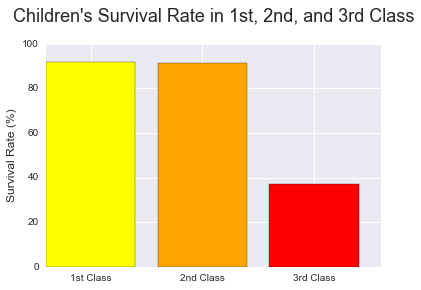

In [56]:
%pylab inline
plt.bar([0, 1, 2] , [91.67, 91.30, 37.18], color = ['yellow', 'orange', 'red'])
plt.ylabel('Survival Rate (%)', fontsize = 12)
plt.xticks([0.4, 1.4, 2.4], ('1st Class', '2nd Class', '3rd Class'))
plt.title('Children\'s Survival Rate in 1st, 2nd, and 3rd Class', fontsize = 18, y = 1.08)

Again, you see a sudden drop in survival rate going from 2nd class to 3rd class. Regardless of what true reasons behind this drop were, it is tragic knowing that one's chance of survival varied so much on which passenger class he/she belonged to. 

We've taken a look at how survival rates vary depending on gender, age, and passenger class so far. One thing that we haven't looked at but would be interesting to look at is if survival rates varied on where one embarked and why, if it did. 

### Survival rates across different ports of embarkation

In [57]:
# NOTE: Below results ignore 2 missing values in "Embarked" Column

#Looking at survival rate of people who embarked in Cherbourg (C)
number_survived_C = float(len(df[(df['Embarked'] == 'C') & (df['Survived'] == 1)]['Survived']))
total_C = float(len(df[df['Embarked'] == 'C']['Survived']))
survival_rate_C = number_survived_C / total_C * 100


#Looking at survival rate of people who embarked in Queenstown (Q)
number_survived_Q = float(len(df[(df['Embarked'] == 'Q') & (df['Survived'] == 1)]['Survived']))
total_Q = float(len(df[df['Embarked'] == 'Q']['Survived']))
survival_rate_Q = number_survived_Q / total_Q * 100


#Looking at survival rate of people who embarked in Southampton (S)
number_survived_S = float(len(df[(df['Embarked'] == 'S') & (df['Survived'] == 1)]['Survived']))
total_S = float(len(df[df['Embarked'] == 'S']['Survived']))
survival_rate_S = number_survived_S / total_S * 100


print "This is the survival rate of those who embarked in Cherbourg (C)", survival_rate_C, '%'
print "This is the survival rate of those who embarked in Queenstown (Q)", survival_rate_Q, '%'
print "This is the survival rate of those who embarked in Southampton (S)", survival_rate_S, '%'

This is the survival rate of those who embarked in Cherbourg (C) 55.3571428571 %
This is the survival rate of those who embarked in Queenstown (Q) 38.961038961 %
This is the survival rate of those who embarked in Southampton (S) 33.6956521739 %


Populating the interactive namespace from numpy and matplotlib


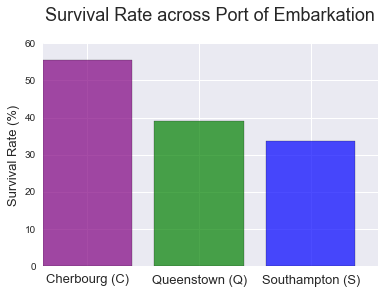

In [58]:
%pylab inline
plt.bar([0, 1, 2] , [55.36, 38.96, 33.70], color = ['purple', 'green', 'blue'], alpha = 0.7)
plt.ylabel('Survival Rate (%)', fontsize = 13)
plt.xticks([0.4, 1.4, 2.4], ('Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'), fontsize = 13)
plt.title('Survival Rate across Port of Embarkation', fontsize = 18, y = 1.08)

What stands out the most from the graph is that the survival rate of those embarked from Cherbourg is higher than the other two groups. The overall survival rate from the Titanic accident was 38.38 %. While survival rates of those who embarked in Queenstown and Southampton are around 38 %, survival rate for those who embarked in Cherbourg is 55.36 %. Why is that ? Could it be that there were more first/second class passengers that embarked from Cherbourg? Were there more women or children? Let's start by seeing the average fare for each port.

In [59]:
# Average fare for those embarked in Cherbourg (C)
avg_fare_C = df[df['Embarked'] == 'C']['Fare'].mean()

# Average fare for those embarked in Queenstown (Q)
avg_fare_Q = df[df['Embarked'] == 'Q']['Fare'].mean()

# Average fare for those embarked in Southampton (S)
avg_fare_S = df[df['Embarked'] == 'S']['Fare'].mean()

print "This is the average fare for those embarked in Cherbourg (C)", avg_fare_C ,'%'
print "This is the average fare for those embarked in Queenstown (Q)", avg_fare_Q ,'%'
print "This is the average fare for those embarked in Southampton (S)", avg_fare_S ,'%'

This is the average fare for those embarked in Cherbourg (C) 59.9541440476 %
This is the average fare for those embarked in Queenstown (Q) 13.2760298701 %
This is the average fare for those embarked in Southampton (S) 27.0798118012 %


The average fare for those embarked in Cherbourg is noticeably higher than the other two, which implies that there were more 1st and/or 2nd class passengers in Cherbourg than the other ports of embarkation. Let's compare the proportions of each passenger class in each port.

In [60]:
# Porportions of Passenger class 1 and 2 in Cherbourg (C)
number_survived_P1_C = float(len(df[(df['Embarked'] == 'C') & (df['Pclass'] == 1)]))
proportion_P1_C = number_survived_P1_C / total_C * 100
number_survived_P2_C = float(len(df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]))
proportion_P2_C = number_survived_P2_C / total_C * 100
number_survived_P3_C = float(len(df[(df['Embarked'] == 'C') & (df['Pclass'] == 3)]))
proportion_P3_C = number_survived_P3_C / total_C * 100

# Porportions of Passenger class 1 and 2 in Queenstown (Q)
number_survived_P1_Q = float(len(df[(df['Embarked'] == 'Q') & (df['Pclass'] == 1)]))
proportion_P1_Q = number_survived_P1_Q / total_Q * 100
number_survived_P2_Q = float(len(df[(df['Embarked'] == 'Q') & (df['Pclass'] == 2)]))
proportion_P2_Q = number_survived_P2_Q / total_Q * 100
number_survived_P3_Q = float(len(df[(df['Embarked'] == 'Q') & (df['Pclass'] == 3)]))
proportion_P3_Q = number_survived_P3_Q / total_Q * 100

# Porportions of Passenger class 1 and 2 in Southampton (S)
number_survived_P1_S = float(len(df[(df['Embarked'] == 'S') & (df['Pclass'] == 1)]))
proportion_P1_S = number_survived_P1_S / total_S * 100
number_survived_P2_S = float(len(df[(df['Embarked'] == 'S') & (df['Pclass'] == 2)]))
proportion_P2_S = number_survived_P2_S / total_S * 100
number_survived_P3_S = float(len(df[(df['Embarked'] == 'S') & (df['Pclass'] == 3)]))
proportion_P3_S = number_survived_P3_S / total_S * 100

print "This is the proportion of first class passengers out of all who embarked in Cherbourg (C)", proportion_P1_C, "%"
print "This is the proportion of second class passengers out of all who embarked in Cherbourg (C)", proportion_P2_C, "%"
print "This is the proportion of third class passengers out of all who embarked in Cherbourg (C)", proportion_P3_C, "%"
print ""
print "This is the proportion of first class passengers out of all who embarked in Queenstown (Q)", proportion_P1_Q, "%"
print "This is the proportion of second class passengers out of all who embarked in Queenstown (Q)", proportion_P2_Q, "%"
print "This is the proportion of third class passengers out of all who embarked in Queenstown (Q)", proportion_P3_Q, "%"
print ""
print "This is the proportion of first class passengers out of all who embarked in Southampton (S)", proportion_P1_S, "%"
print "This is the proportion of second class passengers out of all who embarked in Southampton (S)", proportion_P2_S, "%"
print "This is the proportion of third class passengers out of all who embarked in Southampton (S)", proportion_P3_S, "%"



This is the proportion of first class passengers out of all who embarked in Cherbourg (C) 50.5952380952 %
This is the proportion of second class passengers out of all who embarked in Cherbourg (C) 10.119047619 %
This is the proportion of third class passengers out of all who embarked in Cherbourg (C) 39.2857142857 %

This is the proportion of first class passengers out of all who embarked in Queenstown (Q) 2.5974025974 %
This is the proportion of second class passengers out of all who embarked in Queenstown (Q) 3.8961038961 %
This is the proportion of third class passengers out of all who embarked in Queenstown (Q) 93.5064935065 %

This is the proportion of first class passengers out of all who embarked in Southampton (S) 19.7204968944 %
This is the proportion of second class passengers out of all who embarked in Southampton (S) 25.4658385093 %
This is the proportion of third class passengers out of all who embarked in Southampton (S) 54.8136645963 %


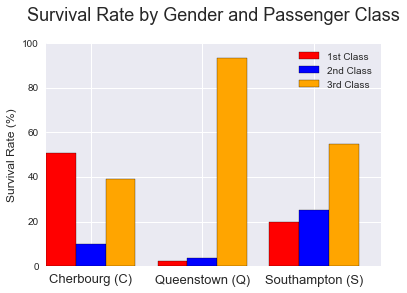

In [61]:
n_groups = 3
surv_rate_1st = (50.60, 2.60, 19.72)
surv_rate_2nd = (10.12, 3.90, 25.47)
surv_rate_3rd = (39.29, 93.51, 54.81)
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.40
barplot_men = plt.bar([0, 1.5, 3], surv_rate_1st, width = bar_width,
                 color='red',
                 label='1st Class')

barplot_women = plt.bar([0.4, 1.9, 3.4], surv_rate_2nd, bar_width,
                 color='blue',
                 label='2nd Class')

barplot_women = plt.bar([0.8, 2.3, 3.8], surv_rate_3rd, bar_width,
                 color='orange',
                 label='3rd Class')

plt.ylabel('Survival Rate (%)', fontsize = 12)
plt.title('Survival Rate by Gender and Passenger Class', fontsize = 18, y = 1.08)
plt.xticks([0.6, 2.1, 3.6], ('Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'), fontsize = 13)
plt.legend()

As expected, more than 50 % of passengers who embarked from Cherbourg were first class passengers while only 2.60 % and 19.72 % of passengers who embarked from Queenstown and Southampton were first class passengers. One thing that I also notice is that although the proportion of third class passengers that embarked from Queenstown (>94 %) is much greater than that of Southampton ( ~54 %), the survival rate of those who embarked in Queenstown (38.96 %) was higher than the survival rate of those who embarked in Southampton (33.70 %). At first glance, this seems peculiar since we saw previously that the survival rate of the third class passengers were the lowest of all classes. Could it be that there were more women and children in Queenstown than in Southampton? Let's find out.

### Calculating proportion of women and children within each embarkation port

In [62]:
#Calculating the proportion of female and children for each port
number_of_women_and_children_C = float(len(df[(df['Embarked'] == 'C') & ((df['Age'] < 18) | (df['Sex'] == 'female'))]))
prop_women_children_C = number_of_women_and_children_C / total_C * 100 

number_of_women_and_children_Q = float(len(df[(df['Embarked'] == 'Q') & ((df['Age'] < 18) | (df['Sex'] == 'female'))]))
prop_women_children_Q = number_of_women_and_children_Q / total_Q * 100 

number_of_women_and_children_S = float(len(df[(df['Embarked'] == 'S') & ((df['Age'] < 18) | (df['Sex'] == 'female'))]))
prop_women_children_S = number_of_women_and_children_S / total_S * 100 

print "This is the proportion of women and children in Cherbourg (C)", prop_women_children_C, '%'
print ""
print "This is the proportion of women and children in Queenstown (Q)", prop_women_children_Q, '%'
print ""
print "This is the proportion of women and children in Southampton (S)", prop_women_children_S, '%'

This is the proportion of women and children in Cherbourg (C) 47.619047619 %

This is the proportion of women and children in Queenstown (Q) 51.9480519481 %

This is the proportion of women and children in Southampton (S) 38.8198757764 %


Populating the interactive namespace from numpy and matplotlib


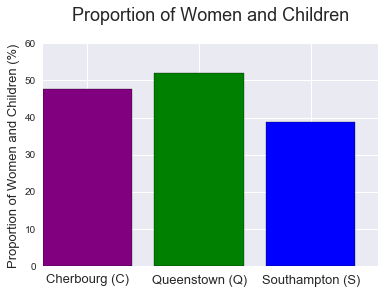

In [63]:
%pylab inline
plt.bar([0, 1, 2] , [47.62, 51.95, 38.82], color = ['purple', 'green', 'blue'])
plt.ylabel('Proportion of Women and Children (%)', fontsize = 13)
plt.xticks([0.4, 1.4, 2.4], ('Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'), fontsize = 13)
plt.title('Proportion of Women and Children', fontsize = 18, y = 1.08)

As suspected, more proportion of women and children embarked in Queenstown than in Southampton. Since the survival rate of women and children tend to be much higher than that of men even for third class passengers, having more women and children may have increased the overall survival rate of passengers who boarded in Queenstown. Let's further break it down to see proportions of female and chilren separately for each port.

In [64]:
# Calculating the proportion of women in each port
number_of_females_C = float(len(df[(df['Embarked'] == 'C') & (df['Sex'] == 'female')]))
prop_of_females_C = number_of_females_C / total_C *  100

number_of_females_Q = float(len(df[(df['Embarked'] == 'Q') & (df['Sex'] == 'female')]))
prop_of_females_Q = number_of_females_Q / total_Q * 100

number_of_females_S = float(len(df[(df['Embarked'] == 'S') & (df['Sex'] == 'female')]))
prop_of_females_S = number_of_females_S / total_S * 100

# Calculating the proportion of children in each port
number_of_children_C = float(len(df[(df['Embarked'] == 'C') & (df['Age'] < 18)]))
prop_of_children_C = number_of_children_C / total_C * 100

number_of_children_Q = float(len(df[(df['Embarked'] == 'Q') & (df['Age'] < 18)]))
prop_of_children_Q = number_of_children_Q / total_Q * 100

number_of_children_S = float(len(df[(df['Embarked'] == 'S') & (df['Age'] < 18)]))
prop_of_children_S = number_of_children_S / total_S * 100

print 'This is proportion of females in Cherbourg (C)', prop_of_females_C, '%'
print 'This is proportion of females in Queenstown (Q)', prop_of_females_Q, '%'
print 'This is proportion of females in Southampton (S)', prop_of_females_S, '%'
print ''
print ''
print 'This is the proportion of children in Cherbourg (C)', prop_of_children_C, '%'
print 'This is the proportion of children in Queenstown (Q)', prop_of_children_Q, '%'
print 'This is the proportion of children in Southampton (S)', prop_of_children_S, '%'

This is proportion of females in Cherbourg (C) 43.4523809524 %
This is proportion of females in Queenstown (Q) 46.7532467532 %
This is proportion of females in Southampton (S) 31.5217391304 %


This is the proportion of children in Cherbourg (C) 14.2857142857 %
This is the proportion of children in Queenstown (Q) 9.09090909091 %
This is the proportion of children in Southampton (S) 12.7329192547 %


From the output above, we can see that proportions of children embarked in Queenstown and in Southampton is around the same. On contrast, proportions of females embarked in Queenstown is about 15 % higher than that in Southampton. To me, this seems to explain at least in part why Queenstown had a slightly higher survival rate than Southampton even though Queenstown had significantly higher proportion of third class passengers. 

## Conclusions
#### Findings:
1. Female survival rate (74.20 %) was greater than male survival rate (18.89 %).
2. Children (under 18) survival rate (53.98 %) was greater than overall survival rate (38.38 %) 
3. Girls' (under 18) survival rate (69.09 %) was greater than boys' (under 18) survival rate (39.66 %)
4. 1st and 2nd class passengers were much more likely to survive than 3rd class passengers. In each passenger class, females and children were still more likely to survive than men and the general population. 
5. Survival rates among the three ports of embarkation differed. This difference seems largely to arise from variations in the passenger classes, gender, and age compositions in each port.

#### Areas unexplored/limitations:
1. Since I did not run statistical tests, I cannot state that the differences in survival rates in any of the groups (male vs female, children vs overall passengers, 1st class vs 2nd class vs 3rd class, etc) are statistically signifcant.
2. There were significant amount of data missing in "Age" column, so the findings on children survival rates may not accurately represent the true survival rates. On contrary, "Embarked" column had only 2 missing values out of 891 rows, so findings relating to ports of embarkation seem reliable. 
3. I haven't examined whether or not younger children are more likely to survive than older children.
4. I also haven't explored whether female children were more likely to survive than male children due soley to gender or to age. For example, female children (under 18) might have been more likely to survive because the female children tended to be younger than the male children.
5. I haven't examined how one's cabin location affects survival. This is somewhat challenging as majority of the data on each passenger's cabin is missing.
6. I did not explore other factors besides the variables present in the "titanic-data.csv".

#### References:
1. http://matplotlib.org/examples/pylab_examples/barchart_demo.html
2. https://pythonspot.com/matplotlib-bar-chart/
3. http://www.abratis.de/sources/pictures/blue.html